In [3]:
import pandas as pd

In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.text import Text
from nltk.corpus import stopwords

In [5]:
import spacy

In [6]:
import re
import string


In [6]:
!pip install textblob

In [7]:
!pip install wordcloud

In [7]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [9]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [10]:
import os
import time
from datetime import date

In [12]:
!pip install snscrape

In [11]:
import snscrape.modules.twitter as sntwitter
import itertools

In [12]:
from collections import Counter
import seaborn as sns

In [73]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from tqdm.auto import tqdm


# Creating list to append tweet data to
tweets_list2 = []

# Using TwitterSearchScraper to scrape data and append tweets to list, also I looked  data for 3 different hashtags
for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('#BezosInSpace since:2021-07-20 until:2021-07-25 lang:en').get_items())):
    if i>50000:
        break
    #print(dir(tweet))
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.place,tweet.user.location,tweet.retweetedTweet,tweet.retweetCount,tweet.quotedTweet])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['date_time', 'tweet_id', 'text', 'username', 'place','location','retweets','retweetcount','quoted_tweets',])

<ipython-input-73-d8f753dfc7d1>:14: FutureWarning: content is deprecated, use rawContent instead
  tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.place,tweet.user.location,tweet.retweetedTweet,tweet.retweetCount,tweet.quotedTweet])


In [74]:
data = tweets_df2.to_csv('twitter_data.csv', index = True)

In [75]:
data1 = pd.read_csv('twitter_data.csv')

In [76]:
data1.shape

(940, 10)

In [77]:
data1.head()

,Unnamed: 0,date_time,tweet_id,text,username,place,location,retweets,retweetcount,quoted_tweets
0,0,2021-07-24 22:29:59+00:00,1419062331473006594,"@elonmusk, is it true that #BezosInSpace in 10...",DavidZZ77,NaN,"Milano, Lombardia",NaN,0,NaN
1,1,2021-07-24 20:20:15+00:00,1419029681597202432,Morning show airtime dedicated to #BezosInSpac...,profgalloway,NaN,London/NYC,NaN,85,NaN
2,2,2021-07-24 19:42:10+00:00,1419020098094866432,@PattyArquette true. my point is the same as y...,mayabreeze11,NaN,NaN,NaN,2,NaN
3,3,2021-07-24 18:42:50+00:00,1419005168461438981,"Yes, we all paid for #BezosInSpace. Time to ma...",ondreka,NaN,NaN,NaN,0,NaN
4,4,2021-07-24 17:16:20+00:00,1418983397783916544,Bezos straight up flew a dick into space #Bezo...,slactoviii,NaN,NaN,NaN,1,NaN


In [78]:
data1.drop(['Unnamed: 0','tweet_id','username','quoted_tweets','place','retweets','retweetcount'], axis = 1, inplace = True)

In [79]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date_time  940 non-null    object
 1   text       940 non-null    object
 2   location   736 non-null    object
dtypes: object(3)
memory usage: 22.2+ KB


In [80]:
def emoji(text):
    emoji_pattern = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    return re.sub(emoji_pattern, "",text) 

In [81]:
def clean_data(text):
    text = re.sub(r'https?:\/\/\S+','',text) # to remove hyperlink from the data
    text = re.sub(r"@[A-Za-z0-9]+","",text) # to remove text present after @character
    text = re.sub(r"_[A-Za-z0-9]+","",text) #to remove text present after _character
    text = re.sub("[RT]","", text) #remove the letter RT
    text = re.sub('\[.*?\]',' ',text) # remove the special character
    text = re.sub('[%s]' % re.escape(string.punctuation),' ',text) # to remove the character #and others
    text = re.sub('\w*\d\w*',' ', text) # to remove numbers
    text = re.sub('[''""]',' ', text) # to remove ''"" characters
    text = re.sub('\n',' ', text) # to remove '\n'
    text = re.sub('[“”‍...…♂️✨☄️ ⬇️ ✊ ⏰  ❤️⚖️➡️]',' ', text) # to remove additional emojis which was unable to remove by the unicode
    return text

In [82]:
data1['text'] = data1['text'].apply(clean_data)
data1['text'] = data1['text'].str.lower()
data1['text'] = data1['text'].apply(emoji)


In [83]:
data1.head(5)

,date_time,text,location
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,"Milano, Lombardia"
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,NaN
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,NaN
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,NaN


In [84]:
data1["country"] = data1["location"].str.split().str[-1]

In [85]:
data1.head()

,date_time,text,location,country
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,"Milano, Lombardia",Lombardia
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC,London/NYC
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,NaN,NaN
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,NaN,NaN
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,NaN,NaN


In [86]:
data1.drop(['location'],axis=1, inplace = True)
data1['country'] = data1['country'].fillna(0)
data1['country'].value_counts()


0                204
USA               54
CA                34
India             28
England           23
                ... 
Mexico             1
Coruña             1
Ma                 1
BC                 1
International      1
Name: country, Length: 331, dtype: int64

In [87]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Denebola
[nltk_data]     Biswas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
data1['tokenized_text'] = data1['text'].apply(word_tokenize) 

In [89]:
data1.head()
r = data1['tokenized_text']
cou = Counter(j for k in r for j in k)
sorted_words = dict(sorted(cou.items(), key = lambda item: item[1],reverse=True))
sorted_words

{'bezosinspace': 941,
 'the': 650,
 'to': 572,
 'a': 467,
 'space': 424,
 'bezos': 368,
 'of': 320,
 'and': 306,
 'i': 284,
 'in': 253,
 'is': 231,
 'you': 230,
 '’': 229,
 'it': 210,
 'he': 209,
 'for': 201,
 'on': 188,
 'that': 181,
 's': 161,
 'his': 150,
 'this': 131,
 't': 129,
 'amazon': 120,
 'all': 117,
 'jeff': 115,
 'can': 104,
 'blueorigin': 103,
 'bezoslaunch': 102,
 'bezosocket': 98,
 'into': 96,
 'about': 92,
 'we': 91,
 'with': 90,
 'just': 89,
 'jeffbezos': 89,
 'have': 87,
 'like': 86,
 'if': 86,
 'what': 85,
 'are': 82,
 'so': 81,
 'was': 81,
 'not': 77,
 'rocket': 69,
 'be': 67,
 'billionaires': 67,
 'my': 66,
 'as': 65,
 'people': 65,
 'how': 64,
 'money': 63,
 'from': 62,
 'do': 62,
 'they': 62,
 'your': 60,
 'or': 58,
 'go': 56,
 'earth': 56,
 'but': 55,
 'their': 55,
 'at': 53,
 'by': 51,
 'no': 51,
 'has': 50,
 'when': 50,
 'more': 49,
 'billionairespaceace': 49,
 'get': 49,
 'would': 47,
 'now': 47,
 'who': 47,
 'an': 46,
 'billionaire': 46,
 'planet': 44,
 'go

In [90]:
from nltk.corpus import stopwords

In [91]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Denebola
[nltk_data]     Biswas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
stop_words = stopwords.words('english')

In [93]:
len(stop_words) 

179

In [94]:
df_data = pd.DataFrame(stop_words)

In [95]:
if 'not' in stop_words: stop_words.remove('not')
len(stop_words)
data1['tokenized_text'] = data1['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])
data1.head()

,date_time,text,country,tokenized_text
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,Lombardia,"[true, bezosinspace, minutes, polluted, €, per..."
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC,"[morning, show, airtime, dedicated, bezosinspa..."
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,0,"[true, point, many, needs, amp, spacecowboys, ..."
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,0,"[yes, paid, bezosinspace, ime, make, amazon, p..."
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,0,"[bezos, straight, flew, dick, space, bezosinsp..."


In [96]:
r1 = data1['tokenized_text']
cou = Counter(j for k in r1 for j in k)
sorted_words1 = dict(sorted(cou.items(), key = lambda item: item[1],reverse=True))
sorted_words1

{'bezosinspace': 941,
 'space': 424,
 'bezos': 368,
 '’': 229,
 'amazon': 120,
 'jeff': 115,
 'blueorigin': 103,
 'bezoslaunch': 102,
 'bezosocket': 98,
 'jeffbezos': 89,
 'like': 86,
 'not': 77,
 'rocket': 69,
 'billionaires': 67,
 'people': 65,
 'money': 63,
 'go': 56,
 'earth': 56,
 'billionairespaceace': 49,
 'get': 49,
 'would': 47,
 'billionaire': 46,
 'planet': 44,
 'going': 44,
 'one': 43,
 'want': 41,
 'amp': 39,
 'dick': 39,
 'branson': 38,
 'flight': 37,
 'moon': 36,
 'hey': 34,
 'think': 34,
 'rich': 34,
 'minutes': 33,
 'back': 33,
 'world': 32,
 'see': 32,
 'penis': 32,
 'us': 31,
 'giant': 31,
 'hat': 31,
 'know': 31,
 'pay': 30,
 'much': 30,
 'employees': 30,
 'really': 30,
 'could': 29,
 'man': 27,
 'time': 27,
 'make': 26,
 'say': 26,
 'went': 25,
 'new': 25,
 'today': 25,
 'looks': 25,
 'paid': 24,
 'first': 24,
 'virgingalactic': 24,
 'workers': 24,
 'every': 24,
 'got': 23,
 'trip': 23,
 'well': 23,
 'need': 22,
 'made': 22,
 'taxes': 22,
 'thing': 21,
 'something'

In [97]:
!python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 650.3 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2023-02-05 06:00:46.889286: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-02-05 06:00:46.889325: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-05 06:00:50.753756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-02-05 06:00:50.754530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-02-05 06:00:50.755230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-02-05 06:00:50.755925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [98]:
tokens = []
nlp = spacy.load("en_core_web_sm")
for doc in nlp.pipe(data1['text'].astype('unicode').values):
    if doc.has_annotation:
        tokens.append([n.text for n in doc])
    else:
        tokens.append(None)
data1['tokenized_text_spacy'] = tokens

In [99]:
data1.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,Lombardia,"[true, bezosinspace, minutes, polluted, €, per...","[ , is, it, true, that, , bezosinspace, in, ..."
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC,"[morning, show, airtime, dedicated, bezosinspa...","[morning, show, airtime, dedicated, to, , bez..."
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,0,"[true, point, many, needs, amp, spacecowboys, ...","[ , true, , my, point, is, the, same, as, you..."
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,0,"[yes, paid, bezosinspace, ime, make, amazon, p...","[yes, , we, all, paid, for, , bezosinspace, ..."
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,0,"[bezos, straight, flew, dick, space, bezosinsp...","[bezos, straight, up, flew, a, dick, into, spa..."


In [100]:
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

In [101]:
len(all_stopwords)
if 'not'in all_stopwords:all_stopwords.remove('not')
len(all_stopwords)

325

In [102]:
data1['tokenized_text_spacy'] = data1['tokenized_text_spacy'].apply(lambda x: [item for item in x if item not in all_stopwords])
data1.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,Lombardia,"[true, bezosinspace, minutes, polluted, €, per...","[ , true, , bezosinspace, , minutes, pollu..."
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC,"[morning, show, airtime, dedicated, bezosinspa...","[morning, airtime, dedicated, , bezosinspace,..."
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,0,"[true, point, many, needs, amp, spacecowboys, ...","[ , true, , point, , needs, , amp, , spa..."
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,0,"[yes, paid, bezosinspace, ime, make, amazon, p...","[yes, , paid, , bezosinspace, , ime, , ama..."
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,0,"[bezos, straight, flew, dick, space, bezosinsp...","[bezos, straight, flew, dick, space, , bezosi..."


In [103]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
data1['tokenized_text'] = data1['tokenized_text'].apply(', '.join)
data1.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,Lombardia,"true, bezosinspace, minutes, polluted, €, per,...","[ , true, , bezosinspace, , minutes, pollu..."
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC,"morning, show, airtime, dedicated, bezosinspac...","[morning, airtime, dedicated, , bezosinspace,..."
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,0,"true, point, many, needs, amp, spacecowboys, ’...","[ , true, , point, , needs, , amp, , spa..."
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,0,"yes, paid, bezosinspace, ime, make, amazon, pa...","[yes, , paid, , bezosinspace, , ime, , ama..."
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,0,"bezos, straight, flew, dick, space, bezosinspace","[bezos, straight, flew, dick, space, , bezosi..."


In [104]:
data1['polarity'] = data1['tokenized_text'].apply(get_polarity)
data1['subjectivity'] = data1['tokenized_text'].apply(get_subjectivity)
def get_analysis(pol):
    if pol>0:
        return 'positive'
    elif pol<0:
        return 'negative'
    else:
        return 'neutral'
data1['analysis'] = data1['polarity'].apply(get_analysis)
data1.head()

,date_time,text,country,tokenized_text,tokenized_text_spacy,polarity,subjectivity,analysis
0,2021-07-24 22:29:59+00:00,is it true that bezosinspace in minutes p...,Lombardia,"true, bezosinspace, minutes, polluted, €, per,...","[ , true, , bezosinspace, , minutes, pollu...",0.116667,0.216667,positive
1,2021-07-24 20:20:15+00:00,morning show airtime dedicated to bezosinspac...,London/NYC,"morning, show, airtime, dedicated, bezosinspac...","[morning, airtime, dedicated, , bezosinspace,...",0.000000,0.000000,neutral
2,2021-07-24 19:42:10+00:00,true my point is the same as yours there a...,0,"true, point, many, needs, amp, spacecowboys, ’...","[ , true, , point, , needs, , amp, , spa...",0.212500,0.537500,positive
3,2021-07-24 18:42:50+00:00,yes we all paid for bezosinspace ime to mak...,0,"yes, paid, bezosinspace, ime, make, amazon, pa...","[yes, , paid, , bezosinspace, , ime, , ama...",0.000000,0.000000,neutral
4,2021-07-24 17:16:20+00:00,bezos straight up flew a dick into space bezo...,0,"bezos, straight, flew, dick, space, bezosinspace","[bezos, straight, flew, dick, space, , bezosi...",0.200000,0.400000,positive


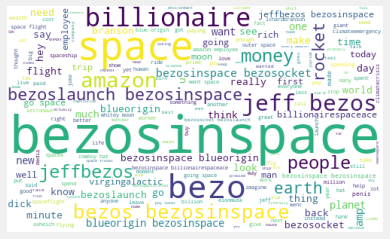

In [105]:
allwords = ' '.join([twee for twee in data1['tokenized_text']])
wordcloud = WordCloud(width = 500, height = 300, background_color = 'white',random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

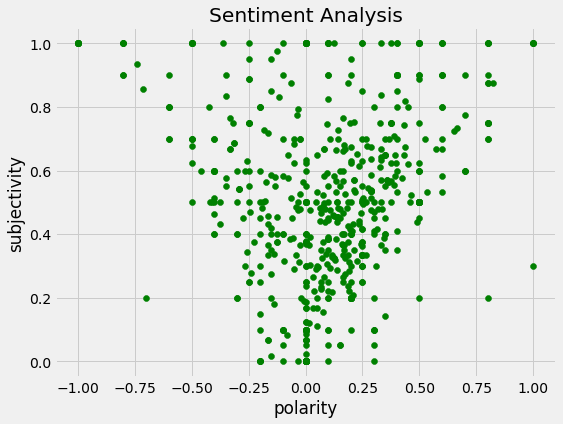

In [106]:
plt.figure(figsize = (8,6))
for i in range(0,data1.shape[0]):
    plt.scatter(data1['polarity'][i],data1['subjectivity'][i], color = 'green')
plt.title('Sentiment Analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

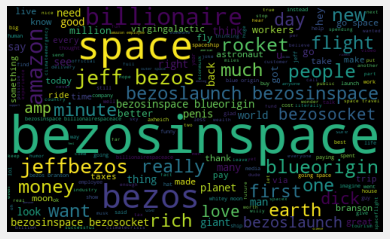

In [107]:
pos_tweets = data1[data1.analysis == 'positive']
pos_tweets = pos_tweets['tokenized_text']
round(pos_tweets.shape[0] / data1.shape[0] *100,1)
len(pos_tweets)
allwords = ' '.join([twee for twee in pos_tweets])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [108]:
neg_tweets = data1[data1.analysis == 'negative']
neg_tweets = neg_tweets['tokenized_text']
round(neg_tweets.shape[0] / data1.shape[0] *100,1)
len(neg_tweets)

188

In [109]:
neu_tweets = data1[data1.analysis == 'neutral']
neu_tweets = neu_tweets['tokenized_text']
round(neu_tweets.shape[0] / data1.shape[0] *100,1)
len(neu_tweets)

369

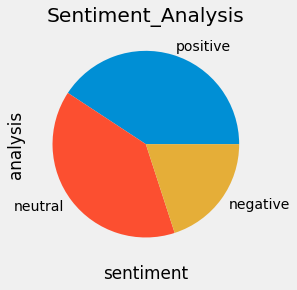

In [110]:
plt.title('Sentiment_Analysis')
plt.xlabel('sentiment')
plt.ylabel('count')
data1['analysis'].value_counts().plot(kind = 'pie')